In [1]:
import matplotlib as mlp
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df_metrics = pd.read_csv('df_metrics.csv')
df_metrics.head()

,TX,RX,Delay,Jitter,Packet Loss,Hour,Model
0,171.172881,18.124910,512.571833,599.500000,0.950000,1.0,SUI
1,171.172881,171.755102,74.819556,34.842105,0.033333,1.0,SUI
2,171.172881,100.295829,529.259889,33.181818,0.433333,1.0,SUI
3,171.172881,167.808534,59.756731,37.949619,0.016667,1.0,SUI
4,171.172881,171.105087,32.333296,4.308554,0.016667,1.0,SUI


In [3]:
df_metris_SUI = df_metrics.query('Model == "SUI"')
df_metris_SUI.describe()

,TX,RX,Delay,Jitter,Packet Loss,Hour
count,3.830000e+02,383.000000,383.000000,383.000000,383.000000,383.0
mean,1.711729e+02,144.388591,279.883271,69.308043,0.194952,1.0
std,6.830133e-13,49.957819,447.704063,161.960547,0.310682,0.0
min,1.711729e+02,8.826469,25.010236,3.220178,0.000000,1.0
25%,1.711729e+02,152.541146,57.038507,18.361235,0.016667,1.0
50%,1.711729e+02,169.931916,71.606908,29.887927,0.033333,1.0
75%,1.711729e+02,171.398355,235.652853,38.057473,0.191667,1.0
max,1.711729e+02,303.208353,2601.922476,1756.991345,0.983333,1.0


In [4]:
df_metris_ECC = df_metrics.query('Model == "ECC"')
df_metris_ECC.describe()

,TX,RX,Delay,Jitter,Packet Loss,Hour
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.0
mean,1.711729e+02,162.395663,91.518872,35.027964,0.070958,1.0
std,6.829753e-13,25.937337,147.204509,28.455047,0.160644,0.0
min,1.711729e+02,25.413186,16.688000,0.805191,0.000000,1.0
25%,1.711729e+02,167.806455,44.864517,24.153482,0.016667,1.0
50%,1.711729e+02,171.049012,59.137033,31.761901,0.016667,1.0
75%,1.711729e+02,171.464127,70.005853,37.774283,0.033333,1.0
max,1.711729e+02,175.886435,1322.344311,359.000000,0.900000,1.0


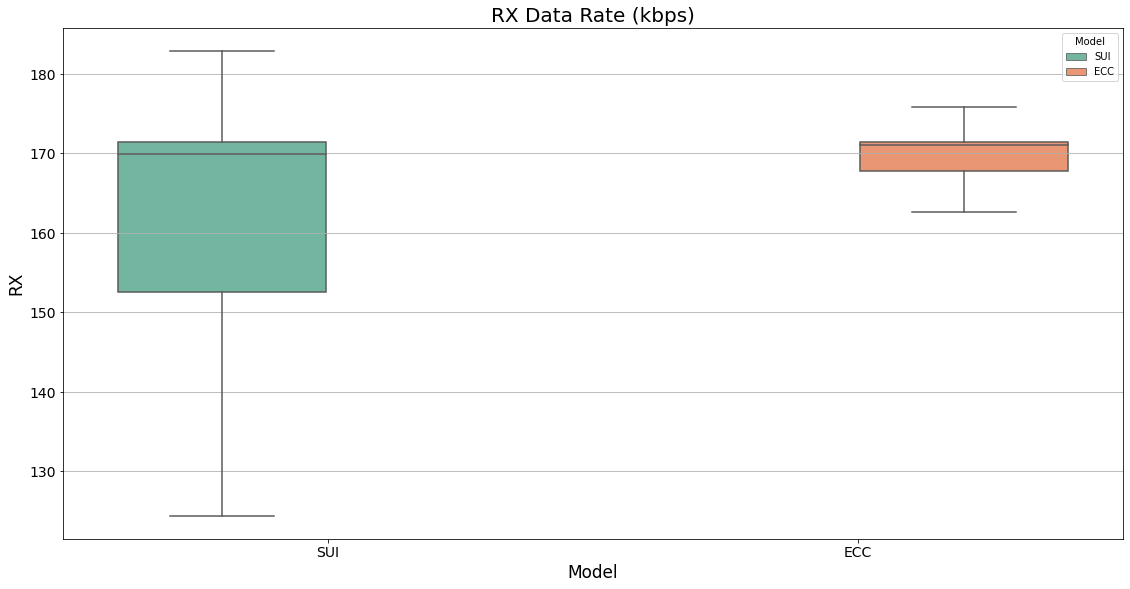

In [24]:
fig, ax = plt.subplots(figsize=(19, 9.4))
ax.grid(True, axis='y')

# Adiciona um título para a região de plotagem (ax)
ax.set_title("RX Data Rate (kbps)", size=20)

plt.xlabel('Model', fontsize=17)
plt.ylabel('RX', fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)


#grafico = sns.boxplot(data=df_metrics, y = 'RX', x = 'Model', palette="Set2", ax=ax, hue='Model')
grafico = sns.boxplot(data=df_metrics, y = 'RX', x = 'Model', palette="Set2", ax=ax, hue='Model', showfliers= False)

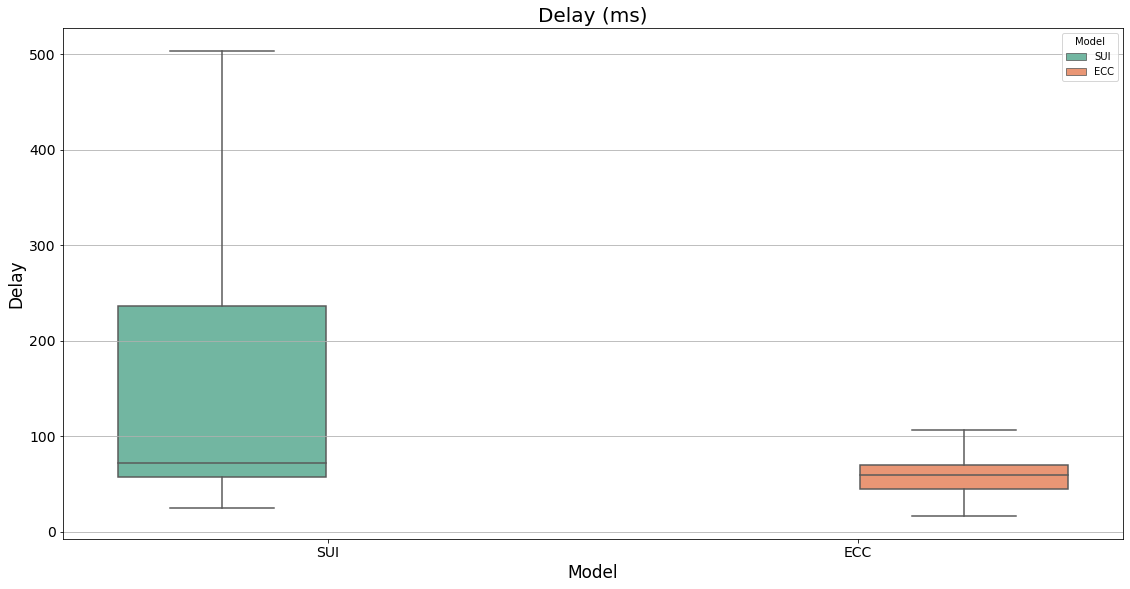

In [25]:
fig, ax = plt.subplots(figsize=(19, 9.4))
ax.grid(True, axis='y')

# Adiciona um título para a região de plotagem (ax)
ax.set_title("Delay (ms)", size=20)

plt.xlabel('Model', fontsize=17)
plt.ylabel('Delay', fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)

#grafico = sns.boxplot(data=df_metrics, y = 'Delay', x = 'Model', palette="Set2", ax=ax, hue='Model')
grafico = sns.boxplot(data=df_metrics, y = 'Delay', x = 'Model', palette="Set2", ax=ax, hue='Model', showfliers=False)


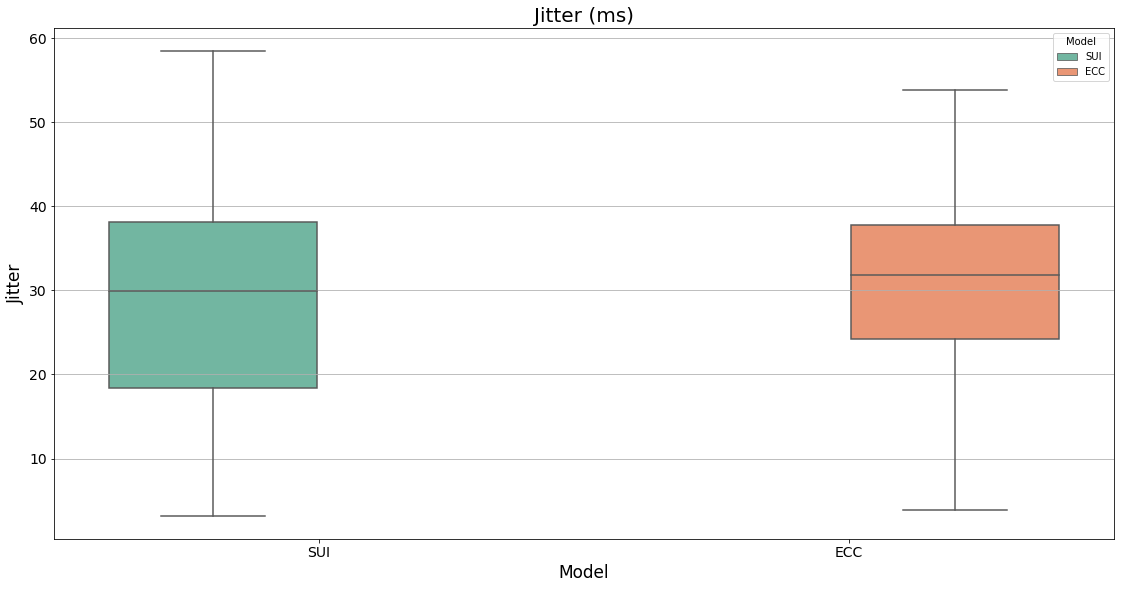

In [26]:
fig, ax = plt.subplots(figsize=(19, 9.4))
ax.grid(True, axis='y')

# Adiciona um título para a região de plotagem (ax)
ax.set_title("Jitter (ms)", size=20)

plt.xlabel('Model', fontsize=17)
plt.ylabel('Jitter', fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)

#grafico = sns.boxplot(data=df_metrics, y = 'Jitter', x = 'Model', palette="Set2", ax=ax, hue='Model')
grafico = sns.boxplot(data=df_metrics, y = 'Jitter', x = 'Model', palette="Set2", ax=ax, hue='Model', showfliers=False)


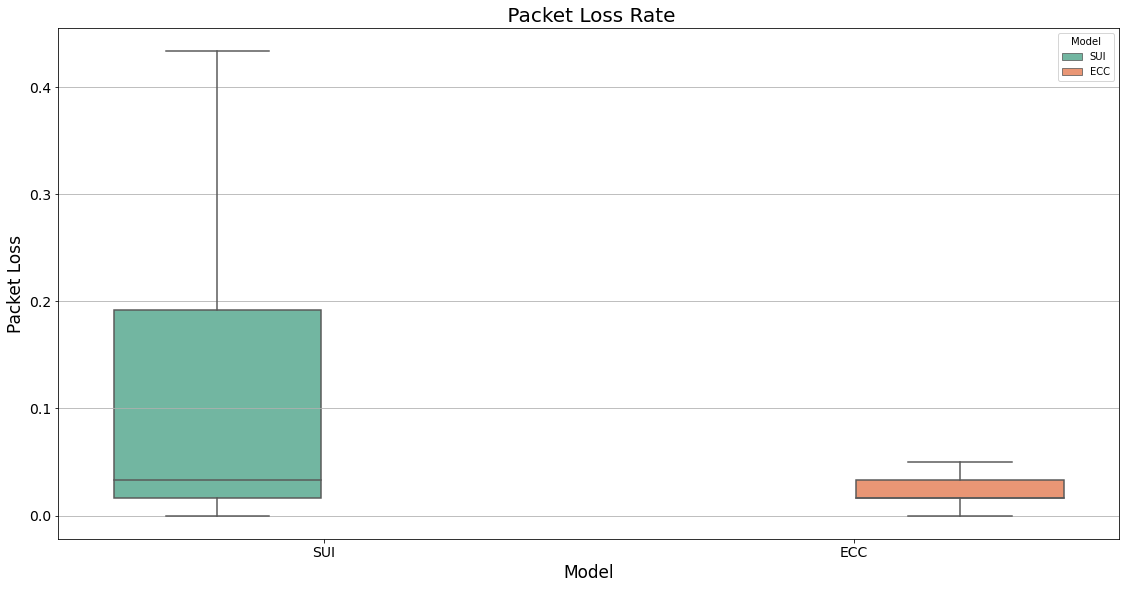

In [29]:
fig, ax = plt.subplots(figsize=(19, 9.4))
ax.grid(True, axis='y')

# Adiciona um título para a região de plotagem (ax)
ax.set_title(" Packet Loss Rate", size=20)

plt.xlabel('Model', fontsize=17)
plt.ylabel('Packet Loss Rate', fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)

#grafico = sns.boxplot(data=df_metrics, y = 'Packet Loss', x = 'Model', palette="Set2", ax=ax, hue='Model')
grafico = sns.boxplot(data=df_metrics, y = 'Packet Loss', x = 'Model', palette="Set2", ax=ax, hue='Model', showfliers=False)


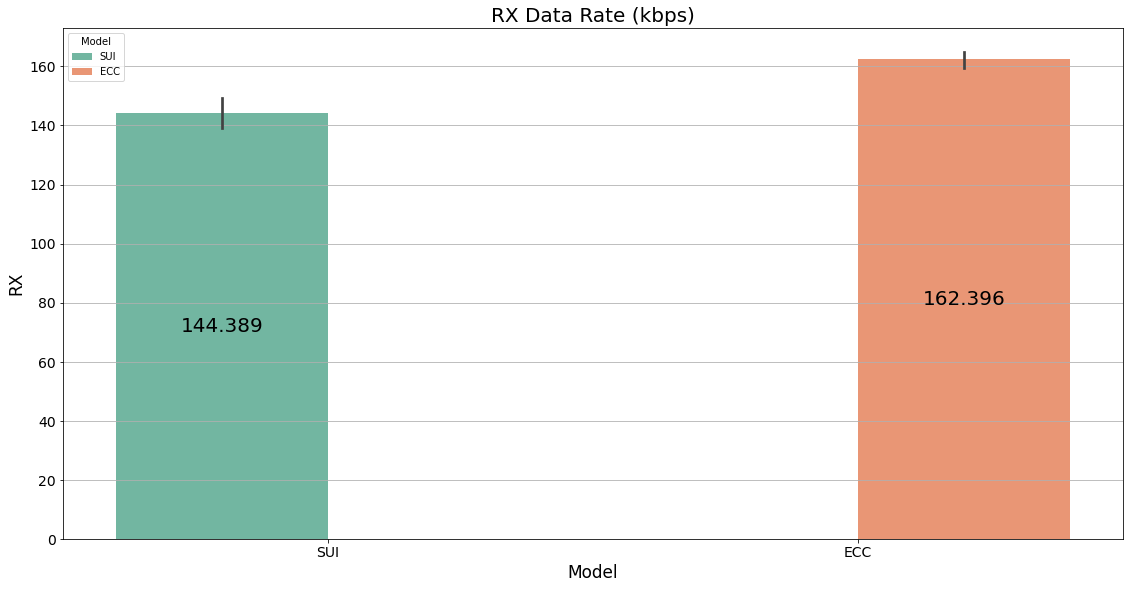

In [31]:
from statistics import mean
from turtle import color


fig, ax = plt.subplots(figsize=(19, 9.4))
ax.grid(True, axis='y')

# Adiciona um título para a região de plotagem (ax)
ax.set_title("RX Data Rate (kbps)", size=20)

plt.xlabel('Model', fontsize=17)
plt.ylabel('',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)

grafico = sns.barplot(data=df_metrics, y = "RX", x = "Model", palette="Set2", ax=ax, hue='Model', estimator = mean, ci=95)
for i in grafico.containers:
    grafico.bar_label(i,label_type='center', color='black', size=20)



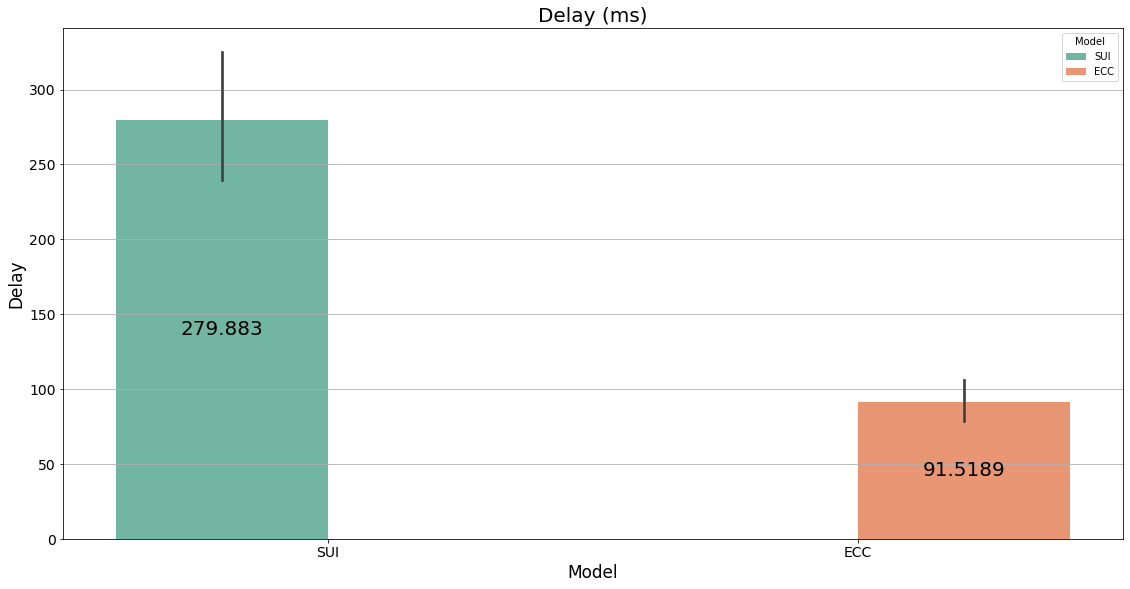

In [32]:
fig, ax = plt.subplots(figsize=(19, 9.4))
ax.grid(True, axis='y')

# Adiciona um título para a região de plotagem (ax)
ax.set_title("Delay (ms)", size=20)

plt.xlabel('Model', fontsize=17)
plt.ylabel('',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)

grafico = sns.barplot(data=df_metrics, y = 'Delay', x = 'Model', palette="Set2", ax=ax, hue='Model', ci=95)
for i in grafico.containers:
    grafico.bar_label(i,label_type='center', color='black', size=20)


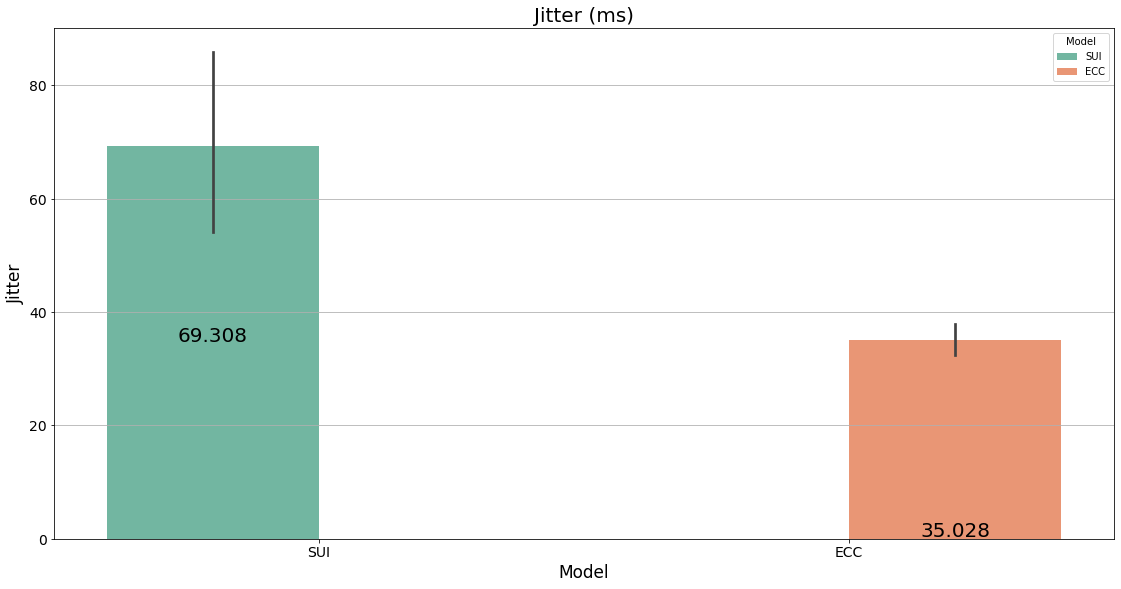

In [33]:
fig, ax = plt.subplots(figsize=(19, 9.4))
ax.grid(True, axis='y')

# Adiciona um título para a região de plotagem (ax)
ax.set_title("Jitter (ms)", size=20)

plt.xlabel('Model', fontsize=17)
plt.ylabel('',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)

grafico = sns.barplot(data=df_metrics, y = 'Jitter', x = 'Model', palette="Set2", ax=ax, hue='Model', ci=95)
for i in grafico.containers:
    grafico.bar_label(i,label_type='edge', color='black', padding=-200, size=20)


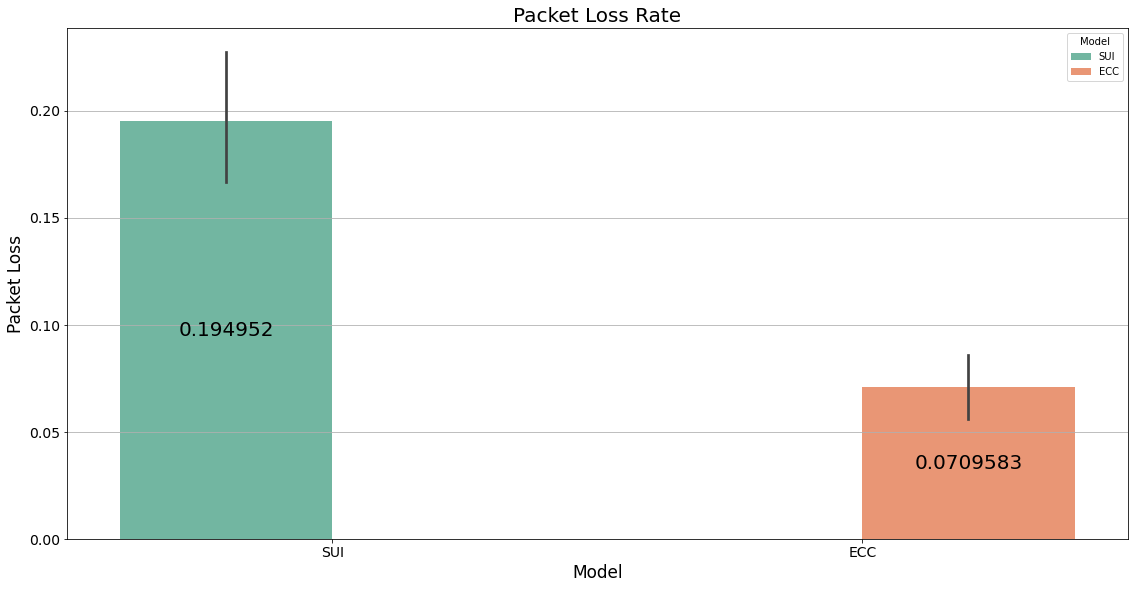

In [34]:
fig, ax = plt.subplots(figsize=(19, 9.4))
ax.grid(True, axis='y')

# Adiciona um título para a região de plotagem (ax)
ax.set_title("Packet Loss Rate", size=20)

plt.xlabel('Model', fontsize=17)
plt.ylabel('',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)

grafico = sns.barplot(data=df_metrics, y = 'Packet Loss', x = 'Model', palette="Set2", ax=ax, hue='Model', ci=95)
for i in grafico.containers:
    grafico.bar_label(i,label_type='center', color='black', size=20)